In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import sklearn
from sklearn.metrics import confusion_matrix
%matplotlib inline  
from os.path import exists, join
import h5py
import random as rn
import os
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
random_state = np.random.RandomState(0)
from sklearn.metrics import roc_curve, auc

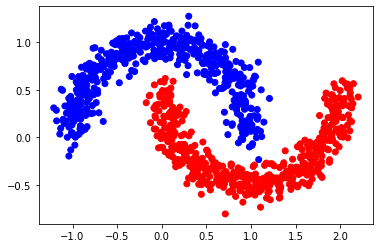

In [2]:
n_samples = 1000
X, Y = datasets.make_moons(n_samples=n_samples, noise=.1)
cols = ['b', 'r', 'g', 'm', 'c']
col = [cols[int(i)] for i in Y]
plt.scatter(X[:,0], X[:,1], color=col)
plt.show()

In [3]:
from sklearn import svm

#Create a svm Classifier
#clf = svm.SVC(kernel='rbf',gamma = 0.1,C=1)
clf = svm.SVC(kernel='poly',degree = 2)
#clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X, Y)
#clf.fit(Y,X)

#Predict the response for test dataset
y_pred = clf.predict(X)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76       500
           1       0.73      0.96      0.83       500

    accuracy                           0.80      1000
   macro avg       0.83      0.80      0.79      1000
weighted avg       0.83      0.80      0.79      1000



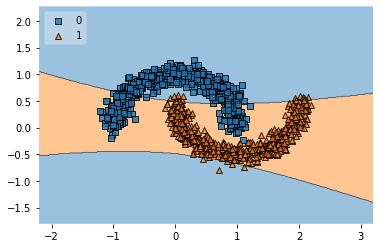

In [5]:
# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, clf, legend=2)
plt.show()

In [6]:
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3,
                                                    random_state=0)

In [7]:
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)

In [8]:
classifier1 = svm.SVC(kernel='poly', probability=True)
probas1_ = classifier1.fit(x_train, y_train).predict_proba(x_test)

In [9]:
classifier2 = svm.SVC(kernel='rbf', probability=True)
probas2_ = classifier2.fit(x_train, y_train).predict_proba(x_test)

In [10]:
classifier3 = svm.SVC(kernel='sigmoid', probability=True)
probas3_ = classifier3.fit(x_train, y_train).predict_proba(x_test)

In [11]:
y_predict = classifier.predict(x_test)
y_predict1 = classifier1.predict(x_test)
y_predict2 = classifier2.predict(x_test)
y_predict3 = classifier3.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict))
confusion = pd.DataFrame(cm)
confusion

,0,1
0,127,15
1,17,141


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = np.array(confusion_matrix(y_test, y_predict1))
confusion = pd.DataFrame(cm1)
confusion

,0,1
0,126,16
1,3,155


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
cm2 = np.array(confusion_matrix(y_test, y_predict2))
confusion = pd.DataFrame(cm2)
confusion

,0,1
0,142,0
1,0,158


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
cm3 = np.array(confusion_matrix(y_test, y_predict3))
confusion = pd.DataFrame(cm3)
confusion

,0,1
0,103,39
1,54,104


In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       142
           1       0.90      0.89      0.90       158

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [17]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       142
           1       0.91      0.98      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



In [18]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       158

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [19]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       142
           1       0.73      0.66      0.69       158

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



In [20]:
total=sum(sum(cm))
total1=sum(sum(cm1))
total2=sum(sum(cm2))
total3=sum(sum(cm3))

In [21]:
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.8933333333333333
Sensitivity :  0.8924050632911392
Specificity :  0.8943661971830986


In [22]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Accuracy :  0.9366666666666666
Sensitivity :  0.9810126582278481
Specificity :  0.8873239436619719


In [23]:
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0


In [24]:
accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

sensitivity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Sensitivity : ', sensitivity3)

specificity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Specificity : ', specificity3)

Accuracy :  0.69
Sensitivity :  0.6582278481012658
Specificity :  0.7253521126760564


In [25]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9609110358352647


In [26]:
fpr1, tpr1, thresholds = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

0.9574344802995186


In [27]:
fpr2, tpr2, thresholds = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

1.0


In [28]:
fpr3, tpr3, thresholds = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)

0.8232528079871635


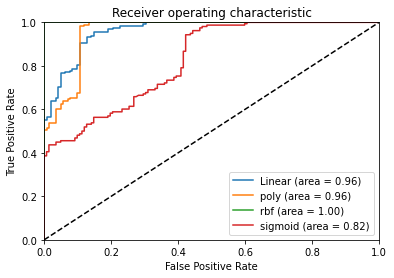

In [29]:
pl.clf()
pl.plot(fpr, tpr, label='Linear (area = %0.2f)' % roc_auc)
pl.plot(fpr1, tpr1, label='poly (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='rbf (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='sigmoid (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [41]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

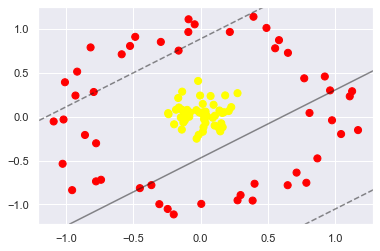

In [42]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [43]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_circles(100, factor=.1, noise=.1)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [ ]:
#importing sci-kit learn and other important libraries
from sklearn.datasets import make_circles
from sklearn import svm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X,Y = make_circles(n_samples=500,noise=0.02)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X1 = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X1[:,:-1] = X
    X1[:,-1] = X3

    return X1
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
 ax = plot3d(X1)

# using the rbf kernel function to use the kernel trick
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

In [ ]:
#importing sci-kit learn and other important libraries
from sklearn.datasets import make_circles
from sklearn import svm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
X,Y = make_circles(n_samples=500,noise=0.02)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [ ]:
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

In [ ]:
# using the rbf kernel function to use the kernel trick
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

In [ ]:
    #plot3d(X,show=True)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
   # X3 = X[:,2]    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    plt.show()